<a href="https://colab.research.google.com/github/vasudha45/Portfolio/blob/main/Auto_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

Import Data

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', index_col=0, parse_dates=True)
X = df.values
print('Shape of data',df.shape)
print('Original Dataset:\n',df.head())
print('After Extracting only temperature:\n',X)

Shape of data (3650, 1)
Original Dataset:
             Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
After Extracting only temperature:
 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


<Axes: xlabel='Date'>

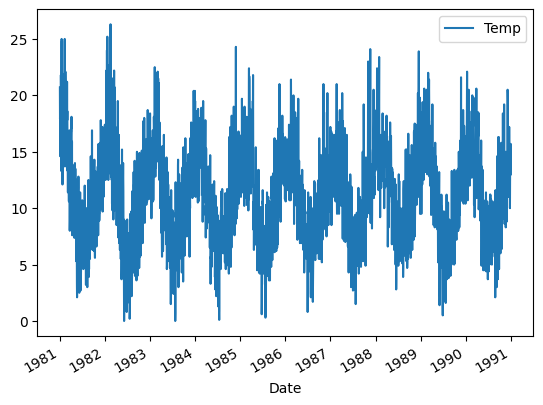

In [7]:
df.plot()

Check for Stationality

In [8]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Temp'], autolag = 'AIC')

print("1. ADF: ",dftest[0])
print("2. P-value: ",dftest[1])
print("3. Num of lags: ",dftest[2])
print("4. Num of Observations Used for ADF Regression and Critical Values Calculation: ",dftest[3])
print("5. Critical Values:")
for key,val in dftest[4].items():
  print("\t",key,":",val)

1. ADF:  -4.4448049246117
2. P-value:  0.0002470826300360994
3. Num of lags:  20
4. Num of Observations Used for ADF Regression and Critical Values Calculation:  3629
5. Critical Values:
	 1% : -3.4321532327220154
	 5% : -2.862336767636517
	 10% : -2.56719413172842


<Axes: xlabel='Date'>

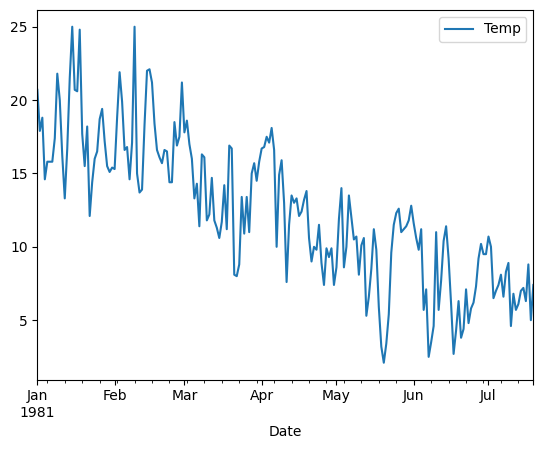

In [9]:
df[:200].plot()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


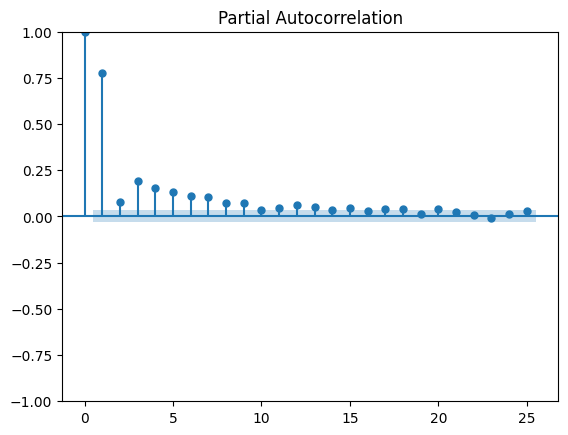

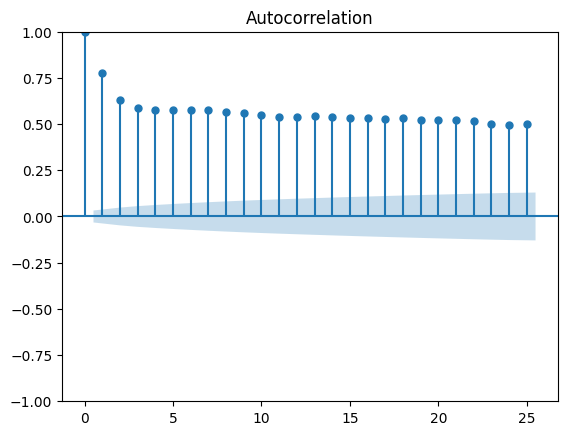

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf = plot_pacf(df['Temp'],lags=25)
acf = plot_acf(df['Temp'], lags=25)

Split dataset into training and testing : Last 7 days


In [11]:
train = X[:len(X)-7]
test = X[len(X)-7:]

In [12]:
model = AutoReg(train,lags = 10).fit()

In [13]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Sun, 23 Apr 2023   AIC                          16775.028
Time:                        07:03:15   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [14]:
print(len(train))

3643


Predictions on test set and compare

In [15]:
pred = model.predict(start = len(train), end = len(X)-1, dynamic = False)

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


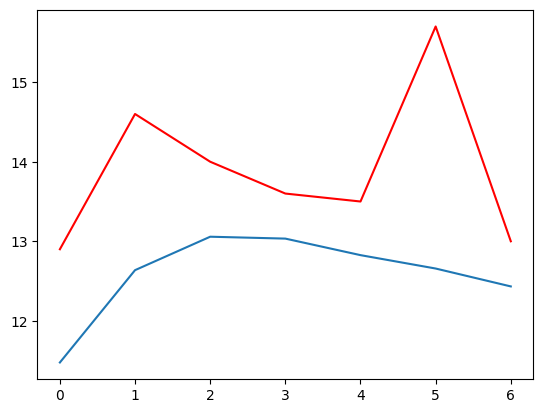

In [16]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color = 'red')
print(pred)

Calculate Error

In [17]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, pred))

In [18]:
print(rmse)

1.5638196220860605


Making Future Predictions

In [19]:
pred_future = model.predict(start = len(X)+1, end = len(X)+7, dynamic = False)
print("The future prediction for the next week")
print(pred_future)
print("Number of Predictions Made: \t",len(pred_future))

The future prediction for the next week
[12.28608804 12.20309536 12.24915916 12.30618875 12.31199689 12.27225975
 12.21843712]
Number of Predictions Made: 	 7
